## Read XML annotation file

In [5]:
import xml.etree.ElementTree as ET
tree = ET.parse('/Users/qy/Desktop/MoNuSeg Training Data/Annotations/TCGA-B0-5710-01Z-00-DX1.xml')
root = tree.getroot()

In [6]:
root.tag

'Annotations'

In [7]:
root.attrib

{'MicronsPerPixel': '0.252000'}

In [8]:
for child in root:
    print(child.tag, child.attrib)

Annotation {'Id': '1', 'Name': '', 'ReadOnly': '0', 'NameReadOnly': '0', 'LineColorReadOnly': '0', 'Incremental': '0', 'Type': '4', 'LineColor': '65280', 'Visible': '1', 'Selected': '1', 'MarkupImagePath': '', 'MacroName': ''}


In [36]:
for neighbor in root.iter('Region'):
    # print(neighbor.attrib)
    idd = neighbor.get('Id')
    # aa = neighbor.get('Area')
    for i in neighbor[1][:3]:
        print(idd, i.get("X"), i.get("Y"))

1 316 503
1 315 504
1 314 504
2 344 489
2 343 488
2 343 489
3 604 451
3 603 450
3 603 451
4 507 424
4 508 423
4 508 424
5 352 687
5 351 687
5 350 687
6 454 672
6 453 671
6 452 672
7 548 735
7 547 735
7 547 736
8 621 664
8 621 665
8 621 666
9 370 755
9 369 754
9 369 755
10 390 777
10 391 778
10 391 779
12 736 629
12 735 628
12 734 628
13 680 479
13 679 480
13 679 481
14 671 769
14 670 769
14 670 770
15 527 809
15 528 810
15 529 811
16 694 597
16 695 598
16 696 598
17 397 675
17 397 674
17 398 674
18 485 611
18 485 610
18 486 611
19 187 737
19 188 737
19 189 737
20 139 775
20 139 774
20 140 774
21 58 756
21 57 756
21 56 756
22 675 611
22 676 611
22 677 611
23 708 583
23 709 583
23 710 583
24 238 701
24 239 701
24 240 701
25 232 796
25 232 797
25 232 798
26 440 874
26 441 874
26 442 874
27 534 647
27 535 646
27 536 648
28 541 591
28 542 591
28 543 591
29 491 781
29 491 780
29 491 779
30 556 911
30 557 911
30 558 911
31 296 670
31 296 671
31 296 672
32 268 675
32 268 676
32 269 676
33 149 

## Generate new mask file

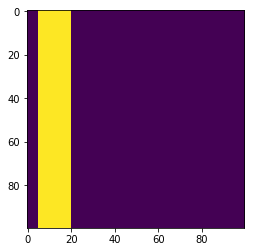

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

img = np.zeros((100, 100))
img[:,5:20] = 100
plt.imshow(img)
plt.show()

## Finally the right order!!
Please note "Y" becomes the x axis, "X" becomes y!!

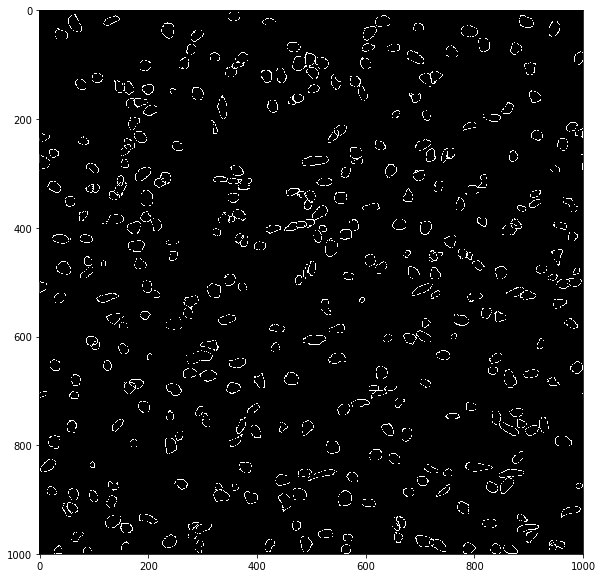

In [13]:
img = np.zeros((1000, 1000))

# fill the segments
for neighbor in root.iter('Region'):
    # print(neighbor.attrib)
    idd = neighbor.get('Id')
    # aa = neighbor.get('Area')
    for i in neighbor[1]:
        # print(idd, i.get("X"), i.get("Y"))
        x,y = round(float(i.get("X"))),round(float(i.get("Y")))
        if(x < 1000 and y < 1000):
            img[y, x] = 255

fig=plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()            

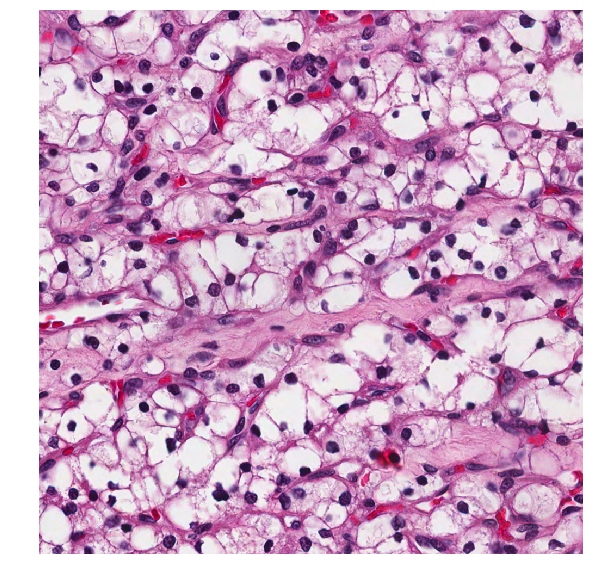

In [3]:
import matplotlib.pyplot as plt 

tis = plt.imread("/Users/qy/Desktop/MoNuSeg Training Data/Tissue images/TCGA-B0-5710-01Z-00-DX1.tif")
fig=plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(tis)
plt.show() 

## Filling the holes

In [15]:
from scipy import ndimage
binary = img.copy()
binary[binary > 0] = 1
img_fill_holes=ndimage.binary_fill_holes(binary).astype(int)

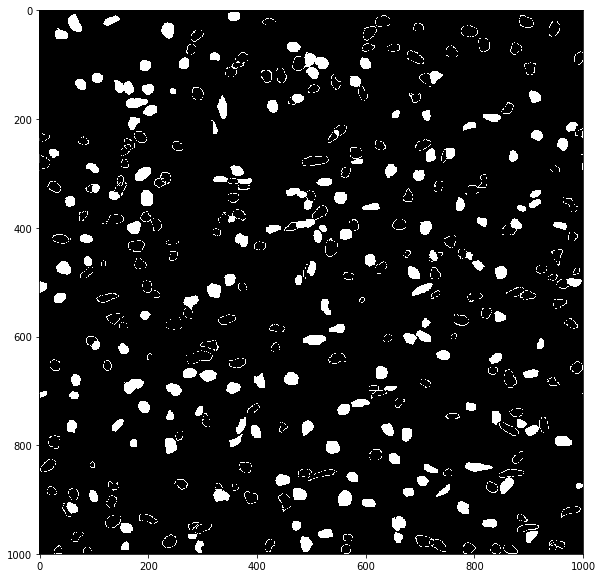

In [17]:
fig=plt.figure(figsize=(10, 10))
plt.imshow(img_fill_holes, cmap=plt.cm.gray)
plt.show()    

## Any other solutions??